In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from ydata_profiling import ProfileReport

In [2]:
df = pd.read_csv('/kaggle/input/list-of-countries-by-average-wage-monthly-yearly/Country_Gross Average Monthly Wages in 2020.csv')

In [3]:
df.head()

,Country,"Gross Average Monthly Wages in 2020 (US$, at current Exchange Rates)[4]"
0,Switzerland *,"7,712.7 USD"
1,Luxembourg *,"6,228.8 USD"
2,Iceland *,"5,862.5 USD"
3,United States *,"5,782.6 USD"
4,Denmark *,"5,701.1 USD"


In [4]:
# Preprocessing (object into number)
df.rename(columns={'Gross Average Monthly Wages in 2020 (US$, at current Exchange Rates)[4]': 'Monthly Wages 2020'}, inplace=True)
df['Monthly Wages 2020'] = df['Monthly Wages 2020'].apply(lambda x: float(x.replace(',', '')[:6]))

# Getting rid of the asterisks
df['Country'] = df['Country'].apply(lambda x: x[:-2])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             51 non-null     object 
 1   Monthly Wages 2020  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


In [6]:
df.describe()

,Monthly Wages 2020
count,51.000000
mean,2327.743137
std,1983.375441
min,142.600000
25%,777.000000
50%,1572.400000
75%,4053.350000
max,7712.700000


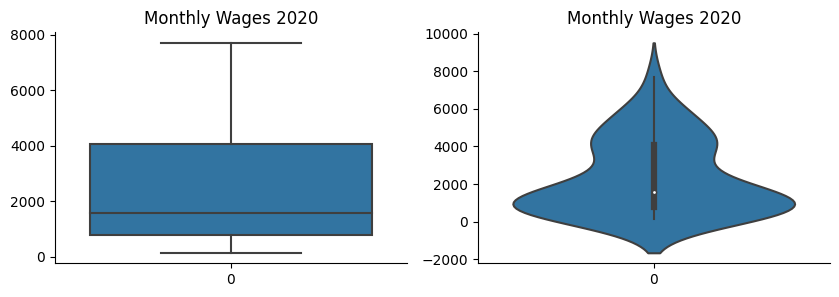

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.boxplot(df['Monthly Wages 2020'], ax=ax[0]);
sns.violinplot(df['Monthly Wages 2020'], ax=ax[1]);
ax[0].set_title('Monthly Wages 2020');
ax[1].set_title('Monthly Wages 2020');

sns.despine()

In [8]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

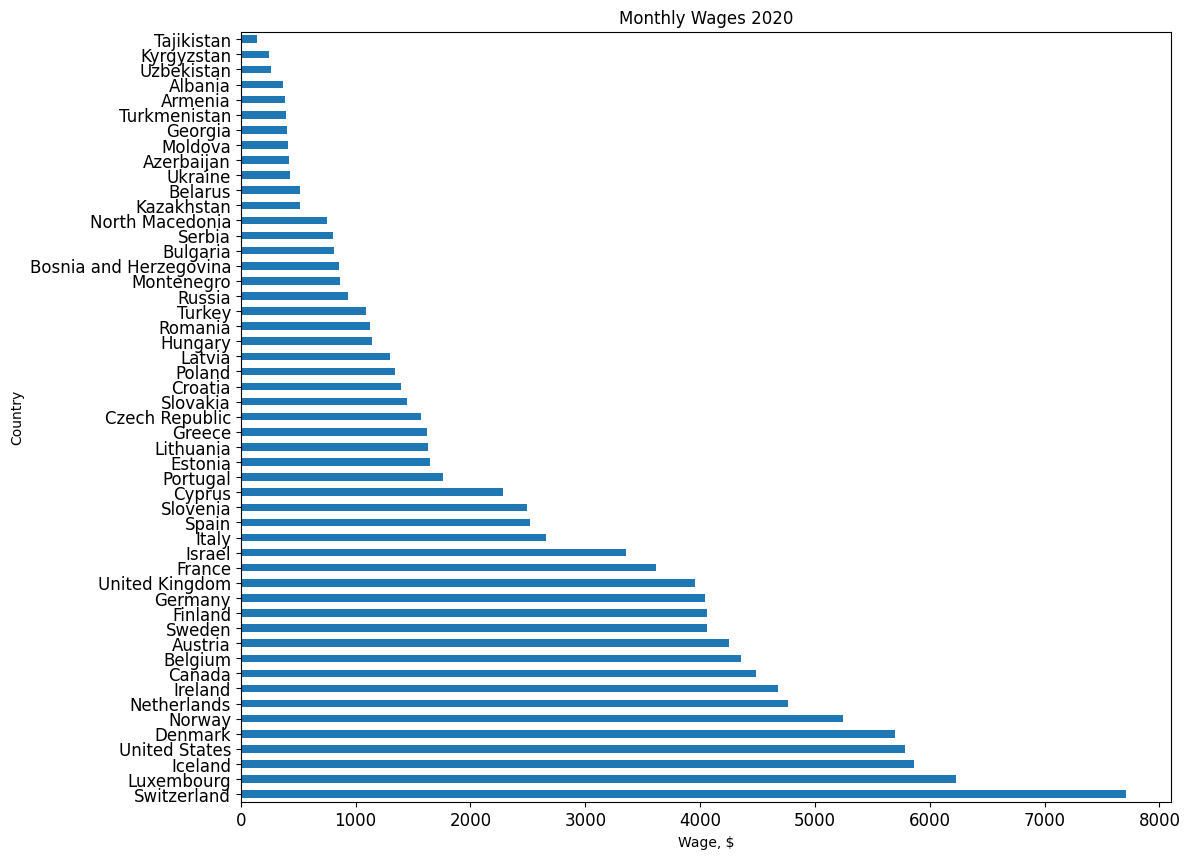

In [9]:
df.plot(kind='barh', x='Country', 
        legend=False, title='Monthly Wages 2020', 
        xlabel='Wage, $', figsize=(12, 10), fontsize=12);

In [10]:
px.choropleth(df,
              color='Monthly Wages 2020',
              locations='Country',
              locationmode='country names',
              color_continuous_scale='icefire')